In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df=pd.read_csv("Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [71]:
label=df.groupby("label")
label

In [72]:
label.get_group("rice")

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
95,88,46,42,22.683191,83.463583,6.604993,194.265172,rice
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
97,60,55,45,21.408658,83.329319,5.935745,287.576694,rice
98,78,35,44,26.543481,84.673536,7.072656,183.622266,rice


In [73]:
label["humidity"].mean()

label
apple          92.333383
banana         80.358123
blackgram      65.118426
chickpea       16.860439
coconut        94.844272
coffee         58.869846
cotton         79.843474
grapes         81.875228
jute           79.639864
kidneybeans    21.605357
lentil         64.804785
maize          65.092249
mango          50.156573
mothbeans      53.160418
mungbean       85.499975
muskmelon      92.342802
orange         92.170209
papaya         92.403388
pigeonpeas     48.061633
pomegranate    90.125504
rice           82.272822
watermelon     85.160375
Name: humidity, dtype: float64

In [74]:
labels=list(label.mean().index)
labels

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [75]:
nitrogen=list(label[["N"]].mean().values.ravel())
nitrogen

[np.float64(20.8),
 np.float64(100.23),
 np.float64(40.02),
 np.float64(40.09),
 np.float64(21.98),
 np.float64(101.2),
 np.float64(117.77),
 np.float64(23.18),
 np.float64(78.4),
 np.float64(20.75),
 np.float64(18.77),
 np.float64(77.76),
 np.float64(20.07),
 np.float64(21.44),
 np.float64(20.99),
 np.float64(100.32),
 np.float64(19.58),
 np.float64(49.88),
 np.float64(20.73),
 np.float64(18.87),
 np.float64(79.89),
 np.float64(99.42)]

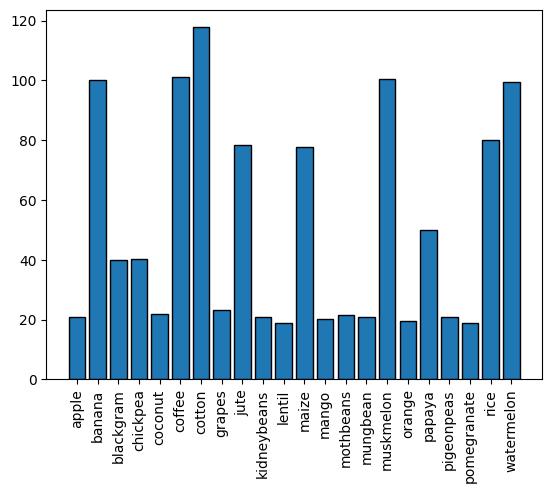

In [76]:
plt.bar(x=labels,height=nitrogen,ec="k")
plt.xticks(rotation=90)
plt.show()

In [77]:
x=df.drop("label",axis=1)


In [78]:
#standard scaler----normalize---outliers se deal krne k liye
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_transformed=sc.fit_transform(x)
x_transformed.shape

(2200, 7)

In [79]:
desc=pd.DataFrame(x_transformed).describe()
desc.head()

,0,1,2,3,4,5,6
count,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03
mean,-1.033517e-16,5.167584e-17,-5.167584e-17,3.875688e-16,-1.808654e-16,-1.291896e-16,1.550275e-16
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-1.369636e+00,-1.466498e+00,-8.521355e-01,-3.316592e+00,-2.570842e+00,-3.831577e+00,-1.515170e+00
25%,-8.006682e-01,-7.690712e-01,-5.559060e-01,-5.623337e-01,-5.040636e-01,-6.433340e-01,-7.081870e-01


In [80]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [81]:
desc_formatted=desc.applymap(lambda x:f"{int(x):d}")
desc_formatted

C:\Users\parul\AppData\Local\Temp\ipykernel_20268\3350164383.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  desc_formatted=desc.applymap(lambda x:f"{int(x):d}")


,0,1,2,3,4,5,6
count,2200,2200,2200,2200,2200,2200,2200
mean,0,0,0,0,0,0,0
std,1,1,1,1,1,1,1
min,-1,-1,0,-3,-2,-3,-1
25%,0,0,0,0,0,0,0
50%,0,0,0,0,0,0,0
75%,0,0,0,0,0,0,0
max,2,2,3,3,1,4,3


In [82]:
from sklearn.cluster import KMeans
kmeans=KMeans()
kmeans.fit(x_transformed)

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [83]:
label=kmeans.labels_

In [84]:
df["cluster_15"]=label

In [85]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,cluster_15
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,7
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,7
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,7
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,7
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,7
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,7
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,1
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,7
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,1


In [86]:
df["cluster_15"].value_counts()

cluster_15
0    465
6    384
1    355
7    312
3    284
5    200
4    159
2     41
Name: count, dtype: int64

In [87]:
df[df["label"]=="rice"]["cluster_15"].value_counts()

cluster_15
7    100
Name: count, dtype: int64

In [88]:
df[df["cluster_15"]==4]["label"].value_counts()

label
apple     100
grapes     59
Name: count, dtype: int64

In [89]:
#model evaluation technique
from sklearn.metrics import silhouette_score
#range---- -1 to 1
silhouette_score(x_transformed,label)

0.2787751071808137

In [90]:
#wcss
kmeans.inertia_

5500.69685469188

In [91]:
WCSS={}
for i in range (5,51):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x_transformed)
    WCSS[i]=kmeans.inertia_


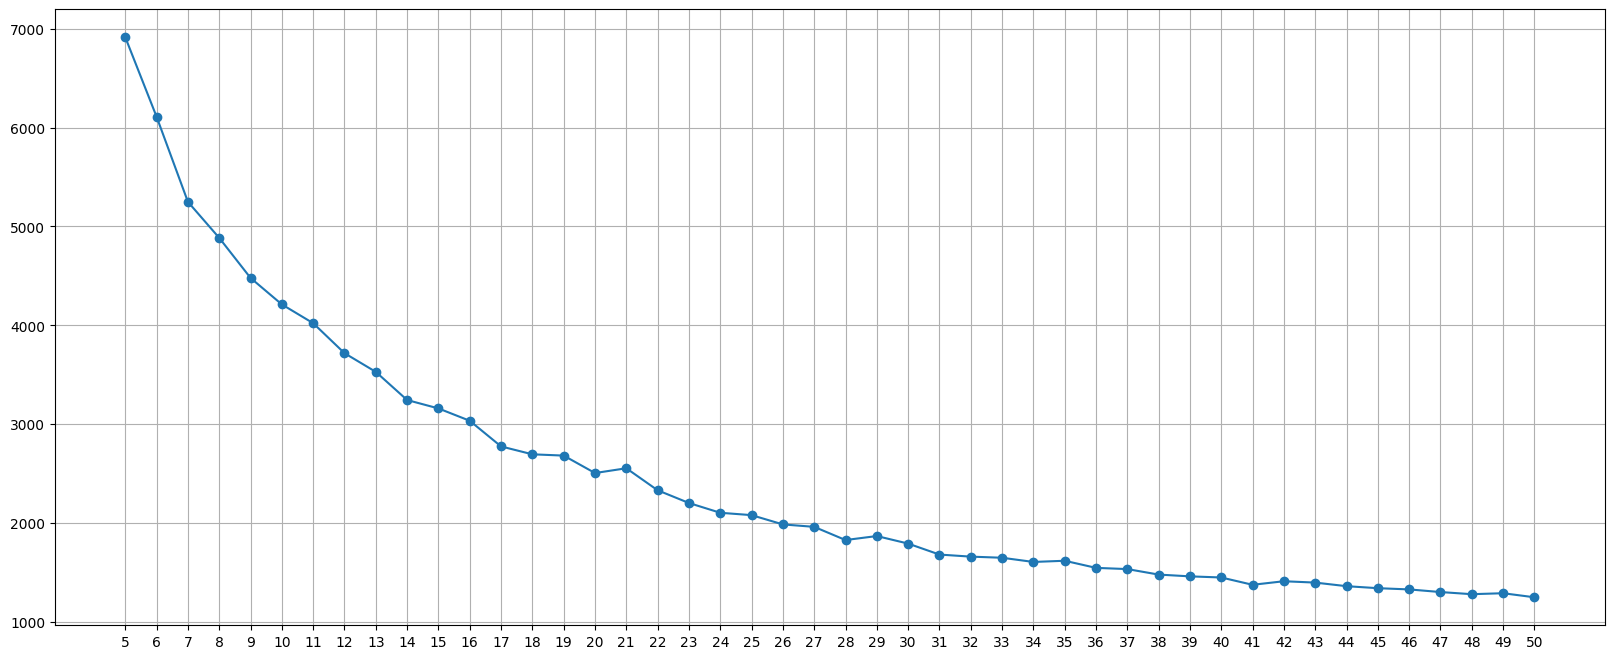

In [92]:
plt.figure(figsize=(20,8))
plt.plot(WCSS.keys(),WCSS.values(),marker="o")
#add a line
plt.xticks(list(WCSS.keys()))
plt.grid(True)

In [93]:
import joblib

In [94]:
joblib.dump(sc,"scaler.lb")

['scaler.lb']

In [95]:
joblib.dump(df,"crop_reco_df.lb")

['crop_reco_df.lb']

In [96]:
joblib.dump(kmeans,"crop_reco_kmeans.lb")

['crop_reco_kmeans.lb']